# Allen Brain Atlas Adult Human Brain (microarray)

Author: Moshe Silverstein <br/>
Date: 5-17 <br/>
Data Source: http://human.brain-map.org/static/download

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import untility_functions as uf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [178]:
importlib.reload(uf)

<module 'untility_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAIN/untility_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Mon Mar 05 14:30:11 2018 EST

# Functions

In [5]:
def mapGeneSymbol(inputDF, geneMetaDF):
    inputDF.index = geneMetaDF['gene_symbol']

In [6]:
def mapSampleData(inputDF, sampleMetaDF):
    
    lst = []

    for index in sampleMetaDF.index:
        lst.append(str(sampleMetaDF.loc[index, 'structure_name']))

    inputDF.columns  = lst

# Donor 9861

## Load Data

In [7]:
matrix_9861 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor9861/MicroarrayExpression.csv', sep=',', header=None, index_col=0)

In [8]:
matrix_9861.head()

,1,2,3,4,5,6,7,8,9,10,...,937,938,939,940,941,942,943,944,945,946
0,,,,,,,,,,,,,,,,,,,,,
1058685,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,3.852665,3.849358,3.018556,3.203562,2.050227,3.487880,2.354469,2.586168,3.495279,3.306209
1058684,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.698639,2.106493,1.573482,2.028703,2.058318,1.620506,1.802832,1.698847,1.839290,1.703562
1058683,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.879796,1.576539,1.835648,1.664253,2.195771,1.832431,1.993473,1.864939,2.073033,1.907132
1058682,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.336135,4.904766,4.305006,5.202678,4.121053,4.507000,4.123025,4.020838,4.222393,4.523669
1058681,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.999358,6.289043,6.515205,6.893379,6.473620,6.326008,6.264416,5.800701,5.901888,6.491646


In [9]:
matrix_9861.shape

(58692, 946)

## Load Gene Info

In [10]:
gene_meta_9861 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor9861/Probes.csv', sep=',')

In [11]:
gene_meta_9861.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [12]:
gene_meta_9861.shape

(58692, 7)

## Load Sample Metadata 

In [13]:
sample_meta_9861 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor9861/SampleAnnot.csv', sep=',')

In [14]:
sample_meta_9861.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
1,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
2,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
3,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
4,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3


In [15]:
sample_meta_9861.shape

(946, 13)

## Map Gene Symbol To ID 

In [16]:
mapGeneSymbol(matrix_9861, gene_meta_9861)

In [17]:
matrix_9861.head()

,1,2,3,4,5,6,7,8,9,10,...,937,938,939,940,941,942,943,944,945,946
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,3.852665,3.849358,3.018556,3.203562,2.050227,3.487880,2.354469,2.586168,3.495279,3.306209
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.698639,2.106493,1.573482,2.028703,2.058318,1.620506,1.802832,1.698847,1.839290,1.703562
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.879796,1.576539,1.835648,1.664253,2.195771,1.832431,1.993473,1.864939,2.073033,1.907132
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.336135,4.904766,4.305006,5.202678,4.121053,4.507000,4.123025,4.020838,4.222393,4.523669
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.999358,6.289043,6.515205,6.893379,6.473620,6.326008,6.264416,5.800701,5.901888,6.491646


## Map Sample Metadata to Sample ID

In [18]:
mapSampleData(matrix_9861, sample_meta_9861)

In [19]:
matrix_9861.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"body of caudate nucleus, right","middle temporal gyrus, right, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","putamen, right","superior frontal gyrus, right, lateral bank of gyrus","III, right, paravermis","IV, right, paravermis","VIIB, right, paravermis","VIIIB, right, paravermis","IX, right, paravermis"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,3.852665,3.849358,3.018556,3.203562,2.050227,3.487880,2.354469,2.586168,3.495279,3.306209
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.698639,2.106493,1.573482,2.028703,2.058318,1.620506,1.802832,1.698847,1.839290,1.703562
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.879796,1.576539,1.835648,1.664253,2.195771,1.832431,1.993473,1.864939,2.073033,1.907132
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.336135,4.904766,4.305006,5.202678,4.121053,4.507000,4.123025,4.020838,4.222393,4.523669
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.999358,6.289043,6.515205,6.893379,6.473620,6.326008,6.264416,5.800701,5.901888,6.491646


# Donor 10021

# Load Data

In [20]:
matrix_10021 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor10021/MicroarrayExpression.csv', sep=',', header=None, index_col=0) 

In [21]:
matrix_10021.head()

,1,2,3,4,5,6,7,8,9,10,...,884,885,886,887,888,889,890,891,892,893
0,,,,,,,,,,,,,,,,,,,,,
1058685,1.941730,2.551864,3.799474,2.611737,2.042585,2.364844,3.134360,2.642679,4.960900,4.006699,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
1058684,1.665724,1.279049,1.279049,1.279049,1.562540,2.503513,1.279049,3.188126,1.627621,1.314205,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
1058683,1.864933,1.403850,1.279049,1.279049,1.584961,1.515691,2.260297,1.497138,1.687892,1.523428,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
1058682,4.547136,4.398344,6.150507,4.805499,4.031808,4.607550,3.550069,4.884513,4.034363,4.938741,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
1058681,7.471887,5.975623,6.773483,5.719231,5.987172,7.072197,6.356866,7.114771,6.666133,6.910525,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


In [22]:
matrix_10021.shape

(58692, 893)

# Load Gene Info

In [23]:
gene_meta_10021 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor10021/Probes.csv', sep=',')

In [24]:
gene_meta_10021.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [25]:
gene_meta_10021.shape

(58692, 7)

# Load Sample Metadata 

In [26]:
sample_meta_10021 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor10021/SampleAnnot.csv', sep=',')

In [27]:
sample_meta_10021.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4322,10,5705,CX,Cl,"claustrum, left",978619,120,91,71,-29.2,5.8,-2.6
1,4291,10,5713,CX,Acb,"nucleus accumbens, left",998603,103,96,71,-10.1,5.9,-8.4
2,4292,10,5721,CX,Acb,"nucleus accumbens, right",998604,86,95,69,8.9,8.5,-7.4
3,4292,11,5729,CX,Acb,"nucleus accumbens, right",999200,87,95,76,7.9,0.8,-6.7
4,4314,11,5737,CX,SI,"substantia innominata, right",992030,79,97,76,16.9,0.9,-9.1


In [28]:
sample_meta_10021.shape

(893, 13)

# Map Gene Symbol To ID 

In [29]:
mapGeneSymbol(matrix_10021, gene_meta_10021)

In [30]:
matrix_10021.head()

,1,2,3,4,5,6,7,8,9,10,...,884,885,886,887,888,889,890,891,892,893
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,1.941730,2.551864,3.799474,2.611737,2.042585,2.364844,3.134360,2.642679,4.960900,4.006699,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
C9,1.665724,1.279049,1.279049,1.279049,1.562540,2.503513,1.279049,3.188126,1.627621,1.314205,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
C9,1.864933,1.403850,1.279049,1.279049,1.584961,1.515691,2.260297,1.497138,1.687892,1.523428,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
MRPL49,4.547136,4.398344,6.150507,4.805499,4.031808,4.607550,3.550069,4.884513,4.034363,4.938741,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
MRPL49,7.471887,5.975623,6.773483,5.719231,5.987172,7.072197,6.356866,7.114771,6.666133,6.910525,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


# Map Sample Metadata to Sample ID

In [31]:
mapSampleData(matrix_10021, sample_meta_10021)

In [32]:
matrix_10021.head()

,"claustrum, left","nucleus accumbens, left","nucleus accumbens, right","nucleus accumbens, right","substantia innominata, right","claustrum, right","globus pallidus, external segment, right","lateral nucleus, right","amygdalohippocampal transition zone, right","basolateral nucleus, right",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,1.941730,2.551864,3.799474,2.611737,2.042585,2.364844,3.134360,2.642679,4.960900,4.006699,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
C9,1.665724,1.279049,1.279049,1.279049,1.562540,2.503513,1.279049,3.188126,1.627621,1.314205,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
C9,1.864933,1.403850,1.279049,1.279049,1.584961,1.515691,2.260297,1.497138,1.687892,1.523428,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
MRPL49,4.547136,4.398344,6.150507,4.805499,4.031808,4.607550,3.550069,4.884513,4.034363,4.938741,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
MRPL49,7.471887,5.975623,6.773483,5.719231,5.987172,7.072197,6.356866,7.114771,6.666133,6.910525,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


### Donor 12876

# Load Data

In [33]:
matrix_12876 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor12876/MicroarrayExpression.csv', sep=',', header=None, index_col=0)

In [34]:
matrix_12876.head()

,1,2,3,4,5,6,7,8,9,10,...,354,355,356,357,358,359,360,361,362,363
0,,,,,,,,,,,,,,,,,,,,,
1058685,3.501077,4.154173,4.103324,3.962034,3.607175,3.397071,4.238925,3.220545,3.347516,4.094927,...,3.375246,3.480794,3.564799,3.637257,3.599206,3.300778,4.132196,3.856427,3.947206,4.180775
1058684,1.757962,1.775427,1.858134,2.655145,1.896092,1.865290,1.659177,1.867601,1.843686,1.618922,...,1.523850,1.922844,1.784602,1.646917,1.769241,1.942787,1.583953,1.441656,1.790438,1.832747
1058683,1.832017,1.975964,2.030700,1.862528,2.190454,2.049008,1.812967,2.142825,2.101910,1.892518,...,1.753807,1.984403,1.992037,1.761356,1.980055,2.100558,1.837774,1.606230,1.842822,1.881435
1058682,4.682878,5.480787,5.136348,5.477912,5.413002,5.105746,4.917350,5.037718,4.954490,5.064677,...,4.123370,4.950811,4.404314,3.523236,4.575995,4.500515,4.466075,3.997458,4.723839,4.706876
1058681,6.198028,6.838466,6.646096,6.745124,6.366537,6.382501,6.277766,6.840333,7.023353,6.435251,...,6.672896,6.222528,6.405737,6.009141,6.544965,6.506476,6.206198,5.850277,6.171046,6.231968


In [35]:
matrix_12876.shape

(58692, 363)

# Load Gene Info

In [36]:
gene_meta_12876 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor12876/Probes.csv', sep=',')

In [37]:
gene_meta_12876.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [38]:
gene_meta_12876.shape

(58692, 7)

# Load Sample Metadata 

In [39]:
sample_meta_12876 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor12876/SampleAnnot.csv', sep=',')

In [40]:
sample_meta_12876.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4143,9,11281,CX,MTG-i,"middle temporal gyrus, left, inferior bank of ...",1283581,149,106,137,-58.0,-46.0,3.0
1,4151,9,11305,CX,ITG-mts,"inferior temporal gyrus, left, bank of mts",1283601,152,128,137,-61.0,-46.0,-19.0
2,4149,9,11289,CX,ITG-its,"inferior temporal gyrus, left, bank of the its",1283603,143,126,137,-52.0,-46.0,-17.0
3,4142,8,11335,CX,MTG-s,"middle temporal gyrus, left, superior bank of ...",1279507,151,108,127,-60.0,-36.0,1.0
4,4135,8,11319,CX,STG-l,"superior temporal gyrus, left, lateral bank of...",1283331,160,100,127,-69.0,-36.0,9.0


In [41]:
sample_meta_12876.shape

(363, 13)

# Map Gene Symbol To ID 

In [42]:
mapGeneSymbol(matrix_12876, gene_meta_12876)

In [43]:
matrix_12876.head()

,1,2,3,4,5,6,7,8,9,10,...,354,355,356,357,358,359,360,361,362,363
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.501077,4.154173,4.103324,3.962034,3.607175,3.397071,4.238925,3.220545,3.347516,4.094927,...,3.375246,3.480794,3.564799,3.637257,3.599206,3.300778,4.132196,3.856427,3.947206,4.180775
C9,1.757962,1.775427,1.858134,2.655145,1.896092,1.865290,1.659177,1.867601,1.843686,1.618922,...,1.523850,1.922844,1.784602,1.646917,1.769241,1.942787,1.583953,1.441656,1.790438,1.832747
C9,1.832017,1.975964,2.030700,1.862528,2.190454,2.049008,1.812967,2.142825,2.101910,1.892518,...,1.753807,1.984403,1.992037,1.761356,1.980055,2.100558,1.837774,1.606230,1.842822,1.881435
MRPL49,4.682878,5.480787,5.136348,5.477912,5.413002,5.105746,4.917350,5.037718,4.954490,5.064677,...,4.123370,4.950811,4.404314,3.523236,4.575995,4.500515,4.466075,3.997458,4.723839,4.706876
MRPL49,6.198028,6.838466,6.646096,6.745124,6.366537,6.382501,6.277766,6.840333,7.023353,6.435251,...,6.672896,6.222528,6.405737,6.009141,6.544965,6.506476,6.206198,5.850277,6.171046,6.231968


# Map Sample Metadata to Sample ID

In [44]:
mapSampleData(matrix_12876, sample_meta_12876)

In [45]:
matrix_12876.head()

,"middle temporal gyrus, left, inferior bank of gyrus","inferior temporal gyrus, left, bank of mts","inferior temporal gyrus, left, bank of the its","middle temporal gyrus, left, superior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","middle temporal gyrus, left, inferior bank of gyrus","short insular gyri, left","long insular gyri, left","planum polare, left","superior temporal gyrus, left, lateral bank of gyrus",...,"cingulate gyrus, parietal part, left, superior bank of gyrus","postcentral gyrus, left, superior lateral aspect of gyrus","precentral gyrus, left, inferior lateral aspect of gyrus","lingual gyrus, left, striate","cingulate gyrus, frontal part, left, inferior bank of gyrus","cingulate gyrus, frontal part, left, superior bank of gyrus","precentral gyrus, left, bank of the precentral sulcus","temporal pole, left, inferior aspect","medial orbital gyrus, left","gyrus rectus, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.501077,4.154173,4.103324,3.962034,3.607175,3.397071,4.238925,3.220545,3.347516,4.094927,...,3.375246,3.480794,3.564799,3.637257,3.599206,3.300778,4.132196,3.856427,3.947206,4.180775
C9,1.757962,1.775427,1.858134,2.655145,1.896092,1.865290,1.659177,1.867601,1.843686,1.618922,...,1.523850,1.922844,1.784602,1.646917,1.769241,1.942787,1.583953,1.441656,1.790438,1.832747
C9,1.832017,1.975964,2.030700,1.862528,2.190454,2.049008,1.812967,2.142825,2.101910,1.892518,...,1.753807,1.984403,1.992037,1.761356,1.980055,2.100558,1.837774,1.606230,1.842822,1.881435
MRPL49,4.682878,5.480787,5.136348,5.477912,5.413002,5.105746,4.917350,5.037718,4.954490,5.064677,...,4.123370,4.950811,4.404314,3.523236,4.575995,4.500515,4.466075,3.997458,4.723839,4.706876
MRPL49,6.198028,6.838466,6.646096,6.745124,6.366537,6.382501,6.277766,6.840333,7.023353,6.435251,...,6.672896,6.222528,6.405737,6.009141,6.544965,6.506476,6.206198,5.850277,6.171046,6.231968


### Donor 14380

# Load Data

In [46]:
matrix_14380 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor14380/MicroarrayExpression.csv', sep=',', header=None, index_col=0)

In [47]:
matrix_14380.head()

,1,2,3,4,5,6,7,8,9,10,...,520,521,522,523,524,525,526,527,528,529
0,,,,,,,,,,,,,,,,,,,,,
1058685,2.349230,4.073994,2.063369,4.062818,2.175373,4.277402,3.519908,3.573504,4.121861,3.873242,...,3.442214,4.282360,3.911087,4.625121,3.846585,3.819738,4.238716,3.902502,1.942014,1.866388
1058684,2.266633,1.618765,1.402384,2.288797,2.343485,1.540203,1.512902,1.514387,1.322988,1.562346,...,1.140209,1.149922,1.101336,1.257846,1.317547,1.156389,1.519237,1.101336,1.521952,1.422704
1058683,1.560374,1.441432,1.543120,1.633509,1.514388,1.387291,1.124255,1.501296,1.517886,1.564849,...,1.329818,1.355566,1.442874,2.399890,1.559560,1.360680,1.196982,1.101336,1.734097,1.521660
1058682,4.554375,4.566328,3.770593,4.923435,5.365513,4.910829,4.684657,5.563801,4.519799,4.876840,...,4.976239,4.937229,4.858159,4.045459,5.117383,4.959478,5.314640,5.018423,5.183790,4.563883
1058681,6.231232,5.983832,5.806320,6.600777,7.385745,6.278422,6.055872,6.265854,6.133697,6.123392,...,6.783221,6.896808,6.825386,5.808479,7.185658,6.802151,6.934643,6.396444,7.396319,6.937484


In [48]:
matrix_14380.shape

(58692, 529)

# Load Gene Info

In [49]:
gene_meta_14380 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor14380/Probes.csv', sep=',')

In [50]:
gene_meta_14380.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [51]:
gene_meta_14380.shape

(58692, 7)

# Load Sample Metadata

In [52]:
sample_meta_14380 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor14380/SampleAnnot.csv', sep=',')

In [53]:
sample_meta_14380.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4296,7,126439333,CX,GPi,"globus pallidus, internal segment, left",114356712,104,108,88,-13.0,3.0,1.0
1,4166,8,126432538,CX,HG,"Heschl's gyrus, left",1407832,144,112,97,-53.0,-6.0,-3.0
2,4735,62,126435762,CB,He-IV,"IV, left, lateral hemisphere",113255856,107,127,124,-16.0,-33.0,-18.0
3,4244,7,126439285,CX,PHG-l,"parahippocampal gyrus, left, lateral bank of g...",114357218,108,143,87,-17.0,4.0,-34.0
4,4244,10,126435744,CX,PHG-l,"parahippocampal gyrus, left, lateral bank of g...",111793985,114,127,117,-23.0,-26.0,-18.0


# Map Gene Symbol To ID

In [54]:
mapGeneSymbol(matrix_14380, gene_meta_14380)

In [55]:
matrix_14380.head()

,1,2,3,4,5,6,7,8,9,10,...,520,521,522,523,524,525,526,527,528,529
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,2.349230,4.073994,2.063369,4.062818,2.175373,4.277402,3.519908,3.573504,4.121861,3.873242,...,3.442214,4.282360,3.911087,4.625121,3.846585,3.819738,4.238716,3.902502,1.942014,1.866388
C9,2.266633,1.618765,1.402384,2.288797,2.343485,1.540203,1.512902,1.514387,1.322988,1.562346,...,1.140209,1.149922,1.101336,1.257846,1.317547,1.156389,1.519237,1.101336,1.521952,1.422704
C9,1.560374,1.441432,1.543120,1.633509,1.514388,1.387291,1.124255,1.501296,1.517886,1.564849,...,1.329818,1.355566,1.442874,2.399890,1.559560,1.360680,1.196982,1.101336,1.734097,1.521660
MRPL49,4.554375,4.566328,3.770593,4.923435,5.365513,4.910829,4.684657,5.563801,4.519799,4.876840,...,4.976239,4.937229,4.858159,4.045459,5.117383,4.959478,5.314640,5.018423,5.183790,4.563883
MRPL49,6.231232,5.983832,5.806320,6.600777,7.385745,6.278422,6.055872,6.265854,6.133697,6.123392,...,6.783221,6.896808,6.825386,5.808479,7.185658,6.802151,6.934643,6.396444,7.396319,6.937484


# Map Sample Metadata to Sample ID

In [56]:
mapSampleData(matrix_14380, sample_meta_14380)

In [57]:
matrix_14380.head()

,"globus pallidus, internal segment, left","Heschl's gyrus, left","IV, left, lateral hemisphere","parahippocampal gyrus, left, lateral bank of gyrus","parahippocampal gyrus, left, lateral bank of gyrus","temporal pole, left, medial aspect","lingual gyrus, left, striate","middle frontal gyrus, left, superior bank of gyrus","inferior temporal gyrus, left, bank of the its","fusiform gyrus, left, bank of the its",...,"rostral group of intralaminar nuclei, left","lateral group of nuclei, left, ventral division","body of caudate nucleus, left","tail of caudate nucleus, left","CA3 field, left","CA2 field, left","CA1 field, left","subiculum, left","supraoptic nucleus, left","putamen, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,2.349230,4.073994,2.063369,4.062818,2.175373,4.277402,3.519908,3.573504,4.121861,3.873242,...,3.442214,4.282360,3.911087,4.625121,3.846585,3.819738,4.238716,3.902502,1.942014,1.866388
C9,2.266633,1.618765,1.402384,2.288797,2.343485,1.540203,1.512902,1.514387,1.322988,1.562346,...,1.140209,1.149922,1.101336,1.257846,1.317547,1.156389,1.519237,1.101336,1.521952,1.422704
C9,1.560374,1.441432,1.543120,1.633509,1.514388,1.387291,1.124255,1.501296,1.517886,1.564849,...,1.329818,1.355566,1.442874,2.399890,1.559560,1.360680,1.196982,1.101336,1.734097,1.521660
MRPL49,4.554375,4.566328,3.770593,4.923435,5.365513,4.910829,4.684657,5.563801,4.519799,4.876840,...,4.976239,4.937229,4.858159,4.045459,5.117383,4.959478,5.314640,5.018423,5.183790,4.563883
MRPL49,6.231232,5.983832,5.806320,6.600777,7.385745,6.278422,6.055872,6.265854,6.133697,6.123392,...,6.783221,6.896808,6.825386,5.808479,7.185658,6.802151,6.934643,6.396444,7.396319,6.937484


### Donor 15496

# Load Data

In [58]:
matrix_15496 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15496/MicroarrayExpression.csv', sep=',', header=None, index_col=0)

In [59]:
matrix_15496.head()

,1,2,3,4,5,6,7,8,9,10,...,461,462,463,464,465,466,467,468,469,470
0,,,,,,,,,,,,,,,,,,,,,
1058685,3.899056,6.833948,3.930160,3.683520,4.224464,3.613614,4.284337,3.363140,3.828996,4.367456,...,4.451382,2.132840,3.683255,2.375000,4.329043,2.296443,3.571570,3.058289,3.290711,3.824577
1058684,1.208098,1.103822,1.088391,1.271396,0.963030,1.133424,1.166084,1.902208,1.530005,0.856984,...,0.978957,1.087546,0.839218,1.023792,1.065705,0.823093,0.875456,1.227250,1.133169,1.041645
1058683,1.388491,2.435345,1.264337,1.477861,1.046296,1.128437,1.366618,1.165439,1.050900,2.064962,...,1.937655,1.282889,2.186504,1.412149,1.140417,2.482464,1.245254,2.124241,1.313611,1.252339
1058682,4.895492,4.188471,5.006615,4.392019,4.858369,4.657021,4.798660,5.375683,4.886835,5.095823,...,5.039121,5.475786,5.107613,4.537474,4.678190,6.488561,6.177084,4.516515,5.157501,5.123728
1058681,6.455984,6.011932,6.566437,6.554449,6.204981,7.059028,6.447568,6.805084,6.427849,6.453763,...,6.907684,7.551731,6.862609,7.052889,6.392494,7.497083,7.851285,7.269663,6.588758,6.492734


In [60]:
matrix_15496.shape

(58692, 470)

# Load Gene Info

In [61]:
gene_meta_15496 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15496/Probes.csv', sep=',')

In [62]:
gene_meta_15496.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [63]:
gene_meta_15496.shape

(58692, 7)

# Load Sample Metadata

In [64]:
sample_meta_15496 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15496/SampleAnnot.csv', sep=',')

In [65]:
sample_meta_15496.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4215,13,141667089,CX,SOG-i,"superior occipital gyrus, left, inferior bank ...",127562730,141,88,171,-50.0,-80.0,21.0
1,4237,11,141667177,CX,CgGr-s,"cingulate gyrus, retrosplenial part, left, sup...",127512019,109,111,144,-18.0,-53.0,-2.0
2,4090,9,141667207,CX,PoG-pcs,"postcentral gyrus, left, bank of the posterior...",127050458,138,59,118,-47.0,-27.0,50.0
3,4107,9,139409861,CX,SMG-i,"supramarginal gyrus, left, inferior bank of gyrus",127050410,159,79,119,-68.0,-28.0,30.0
4,4106,9,139409845,CX,SMG-s,"supramarginal gyrus, left, superior bank of gyrus",127050409,149,64,119,-58.0,-28.0,45.0


In [66]:
sample_meta_15496.shape

(470, 13)

# Map Gene Symbol To ID

In [67]:
mapGeneSymbol(matrix_15496, gene_meta_15496)

In [68]:
matrix_15496.head()

,1,2,3,4,5,6,7,8,9,10,...,461,462,463,464,465,466,467,468,469,470
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.899056,6.833948,3.930160,3.683520,4.224464,3.613614,4.284337,3.363140,3.828996,4.367456,...,4.451382,2.132840,3.683255,2.375000,4.329043,2.296443,3.571570,3.058289,3.290711,3.824577
C9,1.208098,1.103822,1.088391,1.271396,0.963030,1.133424,1.166084,1.902208,1.530005,0.856984,...,0.978957,1.087546,0.839218,1.023792,1.065705,0.823093,0.875456,1.227250,1.133169,1.041645
C9,1.388491,2.435345,1.264337,1.477861,1.046296,1.128437,1.366618,1.165439,1.050900,2.064962,...,1.937655,1.282889,2.186504,1.412149,1.140417,2.482464,1.245254,2.124241,1.313611,1.252339
MRPL49,4.895492,4.188471,5.006615,4.392019,4.858369,4.657021,4.798660,5.375683,4.886835,5.095823,...,5.039121,5.475786,5.107613,4.537474,4.678190,6.488561,6.177084,4.516515,5.157501,5.123728
MRPL49,6.455984,6.011932,6.566437,6.554449,6.204981,7.059028,6.447568,6.805084,6.427849,6.453763,...,6.907684,7.551731,6.862609,7.052889,6.392494,7.497083,7.851285,7.269663,6.588758,6.492734


# Map Sample Metadata to Sample ID

In [69]:
mapSampleData(matrix_15496, sample_meta_15496)

In [70]:
matrix_15496.head()

,"superior occipital gyrus, left, inferior bank of gyrus","cingulate gyrus, retrosplenial part, left, superior bank of gyrus","postcentral gyrus, left, bank of the posterior central sulcus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, left, superior bank of gyrus","inferior temporal gyrus, left, bank of the its","middle temporal gyrus, left, superior bank of gyrus","cingulate gyrus, frontal part, left, inferior bank of gyrus","planum polare, left","superior rostral gyrus, left",...,"pontine raphe nucleus, left","nucleus subceruleus, left","subcuneiform nucleus, left","substantia nigra, pars reticulata, left","substantia nigra, pars reticulata, left","ventral tegmental area, left","substantia nigra, pars reticulata, left","claustrum, left","CA1 field, left","cortico-medial group, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.899056,6.833948,3.930160,3.683520,4.224464,3.613614,4.284337,3.363140,3.828996,4.367456,...,4.451382,2.132840,3.683255,2.375000,4.329043,2.296443,3.571570,3.058289,3.290711,3.824577
C9,1.208098,1.103822,1.088391,1.271396,0.963030,1.133424,1.166084,1.902208,1.530005,0.856984,...,0.978957,1.087546,0.839218,1.023792,1.065705,0.823093,0.875456,1.227250,1.133169,1.041645
C9,1.388491,2.435345,1.264337,1.477861,1.046296,1.128437,1.366618,1.165439,1.050900,2.064962,...,1.937655,1.282889,2.186504,1.412149,1.140417,2.482464,1.245254,2.124241,1.313611,1.252339
MRPL49,4.895492,4.188471,5.006615,4.392019,4.858369,4.657021,4.798660,5.375683,4.886835,5.095823,...,5.039121,5.475786,5.107613,4.537474,4.678190,6.488561,6.177084,4.516515,5.157501,5.123728
MRPL49,6.455984,6.011932,6.566437,6.554449,6.204981,7.059028,6.447568,6.805084,6.427849,6.453763,...,6.907684,7.551731,6.862609,7.052889,6.392494,7.497083,7.851285,7.269663,6.588758,6.492734


### Donor 15697

# Load Data

In [71]:
matrix_15697 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15697/MicroarrayExpression.csv', sep=',', header=None, index_col=0)

In [72]:
matrix_15697.head()

,1,2,3,4,5,6,7,8,9,10,...,492,493,494,495,496,497,498,499,500,501
0,,,,,,,,,,,,,,,,,,,,,
1058685,4.157437,3.203331,4.894200,2.910445,4.339245,4.515806,3.676510,4.256151,4.246963,3.354157,...,4.238947,4.904457,4.538187,4.097456,4.155894,3.827870,4.281830,2.650368,3.819275,4.146520
1058684,1.907210,1.001335,1.051292,0.855665,0.759546,0.674488,1.646201,1.959408,1.715005,0.674488,...,1.241079,0.856178,0.785617,0.674488,0.702592,0.734009,0.674488,1.043909,0.753249,2.347627
1058683,0.981947,0.976337,1.655289,1.099818,0.984885,1.864797,1.023131,0.982008,0.873114,2.331898,...,1.997835,0.993764,0.913364,0.728294,0.904583,1.955166,0.719605,1.237933,1.047155,0.760898
1058682,4.516882,4.932775,5.032131,4.480206,4.752971,4.999351,4.711534,5.063344,5.429228,4.950678,...,4.504203,5.368569,4.261653,4.046281,4.580979,4.951714,4.356187,3.688314,5.973862,5.289773
1058681,6.705410,6.524265,6.638848,7.453678,6.944843,7.227139,7.168984,6.651480,7.198369,7.182751,...,6.643509,6.975886,6.182342,6.497515,6.838988,6.621219,6.222759,6.365968,7.479817,6.949812


In [73]:
matrix_15697.shape

(58692, 501)

# Load Gene Info

In [74]:
gene_meta_15697 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15697/Probes.csv', sep=',')

In [75]:
gene_meta_15697.head()

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
0,1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1,1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
2,1058683,A_32_P203917,731,C9,complement component 9,735.0,5
3,1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
4,1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


In [76]:
gene_meta_15697.shape

(58692, 7)

# Load Sample Metadata

In [77]:
sample_meta_15697 = pd.read_csv('~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Input/normalized_microarray_donor15697/SampleAnnot.csv', sep=',')

In [78]:
sample_meta_15697.head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,9143,92,160535133,BS,7,"facial motor nucleus, left",159127686,83,144,132,8.0,-41.0,-35.0
1,9137,92,160535307,BS,6,"abducens nucleus, left",159122217,89,143,134,2.0,-43.0,-34.0
2,9158,92,160535291,BS,RPn,"pontine raphe nucleus, left",158763790,92,144,132,-1.0,-41.0,-35.0
3,9698,92,160535275,BS,8Ve,"vestibular nuclei, left",159233515,82,144,134,9.0,-43.0,-35.0
4,9677,92,160535259,BS,Sp5,"spinal trigeminal nucleus, left",156687325,80,144,131,11.0,-40.0,-35.0


In [79]:
sample_meta_15697.shape

(501, 13)

# Map Gene Symbol To ID 

In [80]:
mapGeneSymbol(matrix_15697, gene_meta_15697)

In [81]:
matrix_15697.head()

,1,2,3,4,5,6,7,8,9,10,...,492,493,494,495,496,497,498,499,500,501
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,4.157437,3.203331,4.894200,2.910445,4.339245,4.515806,3.676510,4.256151,4.246963,3.354157,...,4.238947,4.904457,4.538187,4.097456,4.155894,3.827870,4.281830,2.650368,3.819275,4.146520
C9,1.907210,1.001335,1.051292,0.855665,0.759546,0.674488,1.646201,1.959408,1.715005,0.674488,...,1.241079,0.856178,0.785617,0.674488,0.702592,0.734009,0.674488,1.043909,0.753249,2.347627
C9,0.981947,0.976337,1.655289,1.099818,0.984885,1.864797,1.023131,0.982008,0.873114,2.331898,...,1.997835,0.993764,0.913364,0.728294,0.904583,1.955166,0.719605,1.237933,1.047155,0.760898
MRPL49,4.516882,4.932775,5.032131,4.480206,4.752971,4.999351,4.711534,5.063344,5.429228,4.950678,...,4.504203,5.368569,4.261653,4.046281,4.580979,4.951714,4.356187,3.688314,5.973862,5.289773
MRPL49,6.705410,6.524265,6.638848,7.453678,6.944843,7.227139,7.168984,6.651480,7.198369,7.182751,...,6.643509,6.975886,6.182342,6.497515,6.838988,6.621219,6.222759,6.365968,7.479817,6.949812


# Map Sample Metadata to Sample ID

In [82]:
mapSampleData(matrix_15697, sample_meta_15697)

In [83]:
matrix_15697.head()

,"facial motor nucleus, left","abducens nucleus, left","pontine raphe nucleus, left","vestibular nuclei, left","spinal trigeminal nucleus, left","pontine nuclei, left","principal sensory nucleus of trigeminal nerve, left","motor nucleus of trigeminal nerve, left","nucleus subceruleus, left","principal sensory nucleus of trigeminal nerve, left",...,"amygdalohippocampal transition zone, left","basal nucleus of meynert, left","lateral nucleus, left","cortico-medial group, left","central nucleus, left","basolateral nucleus, left","globose nucleus, left","emboliform nucleus, left","dentate nucleus, left","dentate nucleus, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,4.157437,3.203331,4.894200,2.910445,4.339245,4.515806,3.676510,4.256151,4.246963,3.354157,...,4.238947,4.904457,4.538187,4.097456,4.155894,3.827870,4.281830,2.650368,3.819275,4.146520
C9,1.907210,1.001335,1.051292,0.855665,0.759546,0.674488,1.646201,1.959408,1.715005,0.674488,...,1.241079,0.856178,0.785617,0.674488,0.702592,0.734009,0.674488,1.043909,0.753249,2.347627
C9,0.981947,0.976337,1.655289,1.099818,0.984885,1.864797,1.023131,0.982008,0.873114,2.331898,...,1.997835,0.993764,0.913364,0.728294,0.904583,1.955166,0.719605,1.237933,1.047155,0.760898
MRPL49,4.516882,4.932775,5.032131,4.480206,4.752971,4.999351,4.711534,5.063344,5.429228,4.950678,...,4.504203,5.368569,4.261653,4.046281,4.580979,4.951714,4.356187,3.688314,5.973862,5.289773
MRPL49,6.705410,6.524265,6.638848,7.453678,6.944843,7.227139,7.168984,6.651480,7.198369,7.182751,...,6.643509,6.975886,6.182342,6.497515,6.838988,6.621219,6.222759,6.365968,7.479817,6.949812


# Combine Donor Datasets

# Unfiltered

In [84]:
matrix = pd.concat([matrix_9861, matrix_14380, matrix_15697, matrix_15496, matrix_12876, matrix_10021], axis=1)

In [85]:
matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


In [86]:
matrix.shape

(58692, 3702)

## Save Unfiltered to file

In [88]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [89]:
normalized_matrix = pd.concat([matrix_9861, matrix_14380, matrix_15697, matrix_15496, matrix_12876, matrix_10021], axis=1)

In [90]:
normalized_matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


In [91]:
normalized_matrix.shape

(58692, 3702)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [92]:
normalized_matrix = uf.removeAndImpute(normalized_matrix)

In [93]:
normalized_matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,2.938440,2.912970,2.062344,3.655761,2.715837,4.274668,3.759001,4.903928,4.258150,4.079339
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.336530,1.338208,1.317621,1.577733,1.677115,1.279049,1.279049,1.279049,1.279049,1.410152
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.408085,1.430103,1.416651,1.691274,1.794972,1.338397,1.279049,1.279049,1.279049,1.561965
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,5.375030,5.398929,4.305211,4.235528,4.032939,4.471348,4.053165,4.226554,4.287815,4.940261
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.660846,6.435792,6.539584,6.131654,6.471048,6.130729,6.492402,5.759537,5.760315,6.530532


In [94]:
normalized_matrix.shape

(58692, 3702)

# Log2 Transform

In [95]:
normalized_matrix = uf.log2(normalized_matrix)

In [96]:
normalized_matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
C8G,2.206578,1.649879,1.799312,1.987311,1.879629,1.514116,1.713887,2.028872,1.859403,1.747994,...,1.977624,1.968264,1.614636,2.219017,1.893687,2.399080,2.250659,2.561675,2.394555,2.344641
C9,1.364225,1.426113,1.573246,1.627362,1.542301,1.379143,1.393265,1.513946,1.515179,1.479760,...,1.224367,1.225403,1.212644,1.366103,1.420679,1.188432,1.188432,1.188432,1.188432,1.269124
C9,1.376530,1.559918,1.674420,1.688870,1.688761,1.354770,1.556127,1.738609,1.701849,1.505656,...,1.267886,1.281017,1.273009,1.428289,1.482834,1.225520,1.188432,1.188432,1.188432,1.357251
MRPL49,2.454935,2.927146,2.646522,2.325754,2.722629,2.727871,2.473035,2.399559,2.738959,2.741293,...,2.672432,2.677831,2.407410,2.388335,2.331401,2.451896,2.337187,2.385860,2.402672,2.570526
MRPL49,2.866179,3.193754,3.161600,2.993575,3.275328,3.129882,3.081129,2.999677,3.098523,3.054716,...,2.937504,2.894486,2.914485,2.834237,2.901311,2.834050,2.905428,2.756924,2.757091,2.912752


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [97]:
normalized_matrix = uf.quantileNormalize(normalized_matrix)

In [98]:
normalized_matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
C8G,2.241742,1.448574,1.416896,1.954471,1.591948,1.502459,1.630964,2.034245,1.610978,2.005050,...,1.984330,2.009977,1.728690,2.287772,2.023987,2.383090,2.125320,2.492318,2.316395,2.322317
C9,1.273230,1.256539,1.263272,1.236993,1.245533,1.324389,1.231870,1.193273,1.239003,1.265311,...,1.292038,1.228898,1.253910,1.306052,1.333796,1.103400,1.103400,1.103400,1.103400,1.237096
C9,1.297545,1.356033,1.321220,1.302448,1.346351,1.288614,1.375773,1.400757,1.375344,1.303650,...,1.348829,1.331134,1.307099,1.421113,1.497479,1.314892,1.103400,1.103400,1.103400,1.319375
MRPL49,2.499141,2.829666,2.597392,2.507093,2.693197,2.724066,2.390157,2.538340,2.684908,2.833735,...,2.664798,2.586871,2.337195,2.432725,2.380059,2.442015,2.224835,2.277897,2.327232,2.532661
MRPL49,2.934360,3.127251,3.091125,3.053306,3.198673,3.128995,3.021099,3.006408,3.023754,3.145454,...,2.939117,2.806060,2.872489,2.846593,2.931937,2.864110,2.883723,2.725638,2.744559,2.883963


# Normalize Matrix (z-score the rows)

In [99]:
uf.zscore(normalized_matrix, 'row')

In [100]:
normalized_matrix.head()

,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"posterior hypothalamic area, left","mammillary body, right","posterior hypothalamic area, right","anterior group of nuclei, right","subiculum, right","CA1 field, right","tail of caudate nucleus, right","basolateral nucleus, right","basomedial nucleus, right","cortico-medial group, right"
C8G,0.259806,-3.610832,-3.765422,-1.142066,-2.911169,-3.347873,-2.720775,-0.752772,-2.818305,-0.895243,...,-0.996358,-0.871200,-2.243874,0.484430,-0.802830,0.949579,-0.308332,1.482613,0.624110,0.653013
C9,0.361704,0.096228,0.203315,-0.214658,-0.078832,1.175392,-0.296145,-0.910021,-0.182687,0.235752,...,0.660838,-0.343410,0.054413,0.883731,1.325006,-2.339469,-2.339469,-2.339469,-2.339469,-0.213014
C9,-0.386912,0.647897,0.031958,-0.300163,0.476605,-0.544937,0.997153,1.439203,0.989563,-0.278896,...,0.520443,0.207362,-0.217885,1.799363,3.150494,-0.080000,-3.821896,-3.821896,-3.821896,-0.000677
MRPL49,-0.114782,2.539781,0.674303,-0.050917,1.443747,1.691671,-0.990070,0.200039,1.377175,2.572456,...,1.215666,0.589810,-1.415429,-0.648190,-1.071175,-0.573578,-2.317830,-1.891670,-1.495447,0.154425
MRPL49,0.341947,2.064840,1.742169,1.404367,2.702786,2.080424,1.116697,0.985478,1.140412,2.227427,...,0.384440,-0.804023,-0.210684,-0.441983,0.320309,-0.285523,-0.110344,-1.522347,-1.353347,-0.108193


## Merge Like Column (by taking the mean)

In [101]:
normalized_matrix = uf.merge(normalized_matrix, 'column', 'mean')

In [102]:
normalized_matrix.shape

(58692, 414)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [103]:
uf.mapgenesymbols(normalized_matrix)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


In [104]:
normalized_matrix.shape

(44826, 414)

# Merge Duplicate Genes By Rows

In [105]:
normalized_matrix = uf.merge(normalized_matrix, 'row', 'mean')

In [106]:
normalized_matrix.shape

(18822, 414)

# Histogram of First Celline

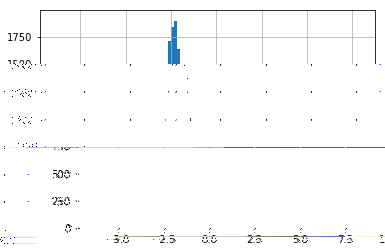

In [107]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

In [108]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=100)

## Save Filtered Matrix

In [109]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Data

In [110]:
# net.load_df(normalized_matrix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=500)
# net.cluster()
# net.widget()

# Create Gene List

In [111]:
gene_list = uf.createGeneList(normalized_matrix)

In [112]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [113]:
gene_list.shape

(18822, 2)

# Save Gene List

In [114]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [115]:
lst = [sample_meta_10021[['structure_name', 'structure_acronym']],
      sample_meta_12876[['structure_name', 'structure_acronym']],
      sample_meta_14380[['structure_name', 'structure_acronym']],
      sample_meta_15496[['structure_name', 'structure_acronym']],
      sample_meta_15697[['structure_name', 'structure_acronym']],
      sample_meta_9861[['structure_name', 'structure_acronym']]]

metaData = pd.concat(lst, axis=0)

In [116]:
metaData.drop_duplicates(inplace=True)

In [117]:
metaData.set_index('structure_name', inplace=True)

In [118]:
metaData.shape

(414, 1)

In [119]:
metaData.head()

,structure_acronym
structure_name,
"claustrum, left",Cl
"nucleus accumbens, left",Acb
"nucleus accumbens, right",Acb
"substantia innominata, right",SI
"claustrum, right",Cl


In [135]:
attribute_list = uf.createAttributeList(normalized_matrix, metaData)

In [136]:
attribute_list.head()

,structure_acronym
Attributes,
"CA1 field, left",CA1
"CA1 field, right",CA1
"CA2 field, left",CA2
"CA2 field, right",CA2
"CA3 field, left",CA3


In [137]:
attribute_list.shape

(414, 1)

# Save Attribute List

In [138]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [140]:
standard_matrix = uf.createStandardizedMatrix(normalized_matrix)

In [141]:
standard_matrix.head()

,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.852856,0.727251,-0.852458,-0.992782,-0.465985,-0.973335,-0.673714,-0.828304,0.601648,0.480875,...,-0.895937,0.157204,0.422904,-0.581927,-0.494971,0.031600,-0.176130,-0.683376,0.611309,0.273146
A1CF,0.128637,0.471632,-0.103247,0.452308,0.346028,0.321873,0.370183,0.573081,0.640714,0.819458,...,0.544096,0.858105,0.442646,0.978878,-0.006629,0.940231,-0.272330,-0.315808,0.355690,0.606897
A2M,0.384257,0.398750,-0.514294,-0.746178,-0.567435,-0.234101,-0.069849,-0.180961,-0.833135,-0.837965,...,0.659619,-0.683376,0.577494,0.422904,-0.523956,0.258653,0.930150,0.949474,0.534015,0.466382
A2ML1,0.591986,-0.026371,0.915658,0.398750,0.872180,0.881841,0.905996,0.761068,-0.031202,-0.649560,...,0.611309,0.794885,0.017107,-0.007048,0.848024,-0.717193,-0.021540,0.007445,-0.654391,0.505029
A3GALT2,-0.658760,-0.649099,-0.731224,-0.866490,-0.697408,-0.639437,-0.629775,-0.518664,-0.842335,-0.876152,...,0.592447,-0.634606,0.737375,0.838824,-0.827843,-0.982575,0.800176,0.790515,0.920949,0.505491


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

In [142]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [143]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [144]:
tertiary_matrix = uf.createTertiaryMatrix(standard_matrix)

In [145]:
tertiary_matrix.head()

,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,-1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0


# Save Teriary Matrix

In [146]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files

In [160]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/'

# Create Up Gene Set Library

In [148]:
name = 'aba_brain_gene_up_set'

In [149]:
uf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [150]:
name = 'aba_brain_gene_down_set'

In [151]:
uf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [152]:
name = 'aba_brain_attribute_up_set'

In [153]:
uf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [154]:
name = 'aba_brain_attribute_down_set'

In [155]:
uf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Gene Similarity Matrix

In [156]:
gene_similarity_matix = uf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [157]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.234788,-0.148672,-0.007408,-0.156110,-0.031642,0.080595,0.246893,-0.167383,0.136543,...,0.141425,-0.143616,0.061811,0.079884,0.410047,0.054890,-0.334305,-0.065957,0.046347,0.063800
A1CF,0.234788,1.000000,-0.202759,0.336492,-0.415163,-0.148530,0.576386,-0.133294,-0.323729,0.609457,...,-0.345885,-0.216680,0.061288,0.210441,0.267992,0.322514,-0.251896,0.005117,0.282070,-0.088385
A2M,-0.148672,-0.202759,1.000000,0.080610,0.515612,0.116389,-0.175121,-0.126951,-0.313889,-0.062019,...,0.046251,-0.122019,-0.106843,-0.353077,-0.375524,0.088427,-0.486143,-0.155592,-0.124782,0.208269
A2ML1,-0.007408,0.336492,0.080610,1.000000,-0.200013,-0.108699,0.340686,-0.325711,-0.502075,0.313930,...,-0.195863,-0.162354,0.219621,0.058310,0.095531,0.199369,-0.353674,-0.209324,0.170418,0.089916
A3GALT2,-0.156110,-0.415163,0.515612,-0.200013,1.000000,0.165993,-0.301356,-0.063723,0.172285,-0.351403,...,0.173347,0.107845,-0.342088,-0.403851,-0.324615,-0.248131,-0.094370,0.131525,-0.156067,0.402121


## Save Gene Similarity Matrix 

In [180]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute Similarity matrix

In [181]:
attribute_similarity_matix = uf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [182]:
attribute_similarity_matix.head()

,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
,,,,,,,,,,,,,,,,,,,,,
"CA1 field, left",1.000000,0.856119,0.768110,0.714238,0.682201,0.687012,0.634631,0.563165,-0.111835,-0.116672,...,0.124448,0.172327,0.054515,0.103687,0.223279,0.103371,-0.065216,-0.007268,-0.124928,0.075597
"CA1 field, right",0.856119,1.000000,0.661732,0.748474,0.611574,0.704632,0.600570,0.658912,-0.100729,-0.106693,...,0.184503,0.092799,0.089226,0.217542,0.176657,0.144201,-0.013951,0.133947,-0.056262,0.200366
"CA2 field, left",0.768110,0.661732,1.000000,0.888877,0.877658,0.831889,0.766025,0.643012,-0.058609,-0.065666,...,0.175376,0.207055,0.022821,0.055207,0.191599,0.073978,-0.068361,-0.040068,-0.196132,0.018640
"CA2 field, right",0.714238,0.748474,0.888877,1.000000,0.810562,0.852634,0.723489,0.702338,-0.045642,-0.054567,...,0.294180,0.204611,0.093715,0.183357,0.209739,0.184216,-0.038692,0.106444,-0.131380,0.157087
"CA3 field, left",0.682201,0.611574,0.877658,0.810562,1.000000,0.921053,0.915309,0.823805,-0.032545,-0.044991,...,0.178807,0.164423,0.073605,0.133815,0.224986,0.080319,0.000174,0.044823,-0.139217,0.080644


## Save Attribute Similarity Matrix

In [183]:
filename = '~/./Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/aba_brain_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [184]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAIN/Output/'

In [185]:
name = 'aba_brain_gene_attribute_edge_list'

In [186]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  414 Out of 414   

 The number of statisticaly relevent gene-attribute associations is: 377048
